# ¿Qué patrones existen entre el consumo y la generación de energía?

**Contexto empresarial.** La oferta y la demanda de energía es un tema muy debatido en los gobiernos y partidos políticos del mundo. Usted es analista de una nueva empresa de plantas de energía nuclear y es responsable de discernir patrones en la generación y el consumo de energía eléctrica en diferentes fuentes de energía, así como en todos los sectores de la economía de los EE. UU. Para ayudar a impulsar la estrategia comercial.

**Problema empresarial.** A su jefe le gustaría que respondiera la siguiente pregunta: **"Dados los patrones de consumo de energía en todos los sectores y en el tiempo, ¿cómo deberíamos asignar los recursos de la empresa a la generación de electricidad?"** y generar archivos de gráficos que haga lo más fácil posible explicar sus hallazgos al C-suite (ejecutivos senior más importantes de una corporación) no técnico para que puedan asignar los recursos de manera adecuada en toda la empresa.

**Contexto analítico.** Los datos fueron entregados en formato CSV por parte de la Administración de Información Energética (EIA) tanto para el consumo de energía como para la generación neta de electricidad, donde el consumo de energía se desglosa por sector y la generación de electricidad se desglosa por fuente. En este caso, usted: (1) procesará previamente los datos para transformarlos en un formato susceptible de análisis posterior; (2) utilizar visualizaciones sencillas en Python para explorar las relaciones entre el consumo de energía en el sector de la energía eléctrica y la generación de electricidad a partir de la energía eléctrica nuclear; (3) identificar los patrones de uso y generación de energía y cómo cambian con el tiempo; y, finalmente, (4) utilizar visualizaciones avanzadas para determinar qué sectores consumen más energía y cómo ha evolucionado con el tiempo.

In [9]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

## Introducción a los datos de la Administración de información energética (EIA)

Los datos de consumo y generación se proporcionan mensualmente en ```energy_consumption.csv``` y ``electric_generation.csv``. El contenido de los datos y algunas características útiles a tener en cuenta sobre los datos son los siguientes:

### energy_consumption.csv
- Contiene el consumo de energía mensual por sector para EE. UU.
- El consumo de energía es el uso de energía como fuente de calor o energía o como insumo en el proceso de fabricación (manufactura).
- La energía primaria se contabiliza primero como energía en un balance energético estadístico, antes de cualquier transformación a formas de energía secundaria o terciaria.
- El consumo total de energía en los sectores consiste en el consumo de energía primaria, las ventas minoristas de electricidad y las pérdidas de energía del sistema eléctrico.

### electricity_generation.csv
- Contiene generación de electricidad neta mensual para todos los sectores en los EE. UU.
- La generación neta de electricidad es la cantidad de generación bruta de electricidad menos el uso de la estación (la energía eléctrica consumida en la (s) estación (es) generadora (s) para el servicio de la estación o auxiliares)
- Btu son las siglas de British Thermal Unit


(Fuente: https://www.eia.gov/totalenergy/data/monthly/pdf/sec13.pdf)

Let's begin by loading the data into Python:

In [10]:
# Load the data into python
energy_consumption_file = os.path.join(os.getcwd(),'energy_consumption.csv')        
electricity_generation_file = os.path.join(os.getcwd(),'electricity_generation.csv')

energy_df = pd.read_csv(energy_consumption_file)
electricity_df = pd.read_csv(electricity_generation_file)

La columna ``Description`` proporciona una descripción del sector (consumo de energía) o de la fuente (generación de electricidad). Veamos todos los valores de descripción disponibles para cada conjunto de datos para comprender qué datos están disponibles.

In [3]:
# Look at energy (consumption) data
################## completar

,YYYYMM,Value,Description,Unit
0,197301,1313.816,Primary Energy Consumed by the Residential Sector,Trillion Btu
1,197302,1150.011,Primary Energy Consumed by the Residential Sector,Trillion Btu
2,197303,970.362,Primary Energy Consumed by the Residential Sector,Trillion Btu
3,197304,709.631,Primary Energy Consumed by the Residential Sector,Trillion Btu
4,197305,544.596,Primary Energy Consumed by the Residential Sector,Trillion Btu


In [4]:
# Get all unique descriptions available
################## completar

['Primary Energy Consumed by the Residential Sector'
 'Total Energy Consumed by the Residential Sector'
 'Primary Energy Consumed by the Commercial Sector'
 'Total Energy Consumed by the Commercial Sector'
 'Primary Energy Consumed by the Industrial Sector'
 'Total Energy Consumed by the Industrial Sector'
 'Primary Energy Consumed by the Transportation Sector'
 'Total Energy Consumed by the Transportation Sector'
 'Primary Energy Consumed by the Electric Power Sector'
 'Primary Energy Consumption Total']


In [5]:
# Look at electricity (generation) data
################## completar

,YYYYMM,Value,Description,Unit
0,197301,75190.149,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,197302,67797.946,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,197303,67387.612,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,197304,63935.049,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,197305,64927.181,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [6]:
# Get all unique descriptions available
################## completar

['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation Total, All Sectors']


Here we see that we have a variety of energy consumption sectors, as well as a variety of energy generation sources for each sector. We are specifically interested in nuclear electric power generation and electric power consumption as the firm's main sources of revenue stem from these.

## Procesamiento previo de datos para simplificar el análisis en el futuro

Como se vio en casos anteriores, es bueno transformar los datos en un formato que sea susceptible de análisis adicional. La columna ``YYYYMM`` para el mes y el año es actualmente difícil de usar, así que analicémoslos por separado:

In [11]:
# Extract the month
energy_df['MM'] = ################## completar
electricity_df['MM'] = ################## completar

# Extract the year
energy_df['YYYY'] = ################## completar
electricity_df['YYYY'] = ################## completar

Además, observe que las descripciones existentes son bastante largas. También podríamos usar algunas abreviaturas:

- PEC: Primary Energy Consumption (Consumo de energía primaria)
- TEC: Total Energy Consumption (Consumo total de energía)
- ENG: Electricity Net Generation (Generación neta de electricidad)

Cambiemos la columna ```Description``` para usar la forma abreviada y reducir el desorden de la salida. Esto será útil cuando estemos visualizando la información más adelante y deseemos figuras organizadas y limpias:

In [14]:
# Rename Descriptions for the energy data
energy_short_dict = {'Primary Energy Consumed by the Commercial Sector': 'PEC Commercial Sector',
              'Primary Energy Consumed by the Electric Power Sector': 'PEC Electric Power Sector',
              'Primary Energy Consumed by the Industrial Sector': 'PEC Industrial Sector',
              'Primary Energy Consumed by the Residential Sector': 'PEC Residential Sector',
              'Primary Energy Consumed by the Transportation Sector': 'PEC Transportation Sector',
              'Primary Energy Consumption Total': 'PEC Total',
              'Total Energy Consumed by the Commercial Sector': 'TEC Commercial Sector',
              'Total Energy Consumed by the Industrial Sector': 'TEC Industrial Sector',
              'Total Energy Consumed by the Residential Sector': 'TEC Residential Sector',
              'Total Energy Consumed by the Transportation Sector': 'TEC Transportation Sector'}

# Clean up names by shortening description
clean_energy_df = energy_df.copy()
clean_energy_df['Description'] = ################## completar
clean_energy_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973


In [15]:
# Rename Descriptions for the electricity data
electricity_short_dict = {'Electricity Net Generation From Coal, All Sectors': 'ENG Coal',
                          'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors': 'ENG HE Power',
                          'Electricity Net Generation From Geothermal, All Sectors': 'ENG Geothermal',
                          'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors': 'ENG HE Pumped Storage',
                          'Electricity Net Generation From Natural Gas, All Sectors': 'ENG Natural Gas',
                          'Electricity Net Generation From Nuclear Electric Power, All Sectors': 'ENG Nuclear Electric Power',
                          'Electricity Net Generation From Other Gases, All Sectors': 'ENG Other Gases',
                          'Electricity Net Generation From Petroleum, All Sectors': 'ENG Petroleum',
                          'Electricity Net Generation From Solar, All Sectors': 'ENG Solar',
                          'Electricity Net Generation From Waste, All Sectors': 'ENG Waste',
                          'Electricity Net Generation From Wind, All Sectors': 'ENG Wind',
                          'Electricity Net Generation From Wood, All Sectors': 'ENG Wood',
                          'Electricity Net Generation Total, All Sectors': 'ENG Total'}

# Clean up names by shortening description
clean_electricity_df = electricity_df.copy()
clean_electricity_df['Description'] = ################## completar
clean_electricity_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY
0,197301,75190.149,ENG Coal,Million Kilowatthours,1,1973
1,197302,67797.946,ENG Coal,Million Kilowatthours,2,1973
2,197303,67387.612,ENG Coal,Million Kilowatthours,3,1973
3,197304,63935.049,ENG Coal,Million Kilowatthours,4,1973
4,197305,64927.181,ENG Coal,Million Kilowatthours,5,1973


Con los datos procesados, comencemos a visualizar para ver si podemos descubrir patrones ocultos.

## Identificando la relación entre consumo energético y generación

Recall that our boss wants to determine how to optimally allocate the firm's electricity generation resources given consumption patterns. It makes sense to look at how consumption patterns have generally varied across time and sectors in order to drive electricity generation strategy. Let's analyze this by doing some basic plotting in Python's ubiquitous plotting package ```matplotlib```. Given that we represent a global nuclear power plant firm, one thing that makes sense to look at is the relationship between energy consumption by each major sector and the net energy generation from nuclear electric power. We will first use a 2D scatterplot to visualize the data. Scatterplots are versatile and are often the first type of plot one uses when visualizing a dataset.

We'll start with the electric power sector; we'll build a scatterplot with ```PEC Electric Power Sector``` on the y-axis, and ```ENG Nuclear Electric Power``` on the x-axis. This will allow us to see how electric power energy consumption moves in relation to nuclear electric power generation:


Recuerde que nuestro jefe quiere determinar cómo asignar de manera óptima los recursos de generación de electricidad de la empresa dados los patrones de consumo. Tiene sentido observar cómo los patrones de consumo generalmente han variado a lo largo del tiempo y los sectores para impulsar la estrategia de generación de electricidad. Analicemos esto haciendo una visualización básica usando el paquete de Python ```matplotlib```. Dado que representamos a una empresa mundial de plantas de energía nuclear, una cosa que tiene sentido es observar la relación entre el consumo de energía de cada sector importante y la generación neta de energía a partir de la energía eléctrica nuclear. Primero usaremos un diagrama de dispersión 2D para visualizar los datos. Los diagramas de dispersión son versátiles y, a menudo, son el primer tipo de diagrama que se usa al visualizar un conjunto de datos.

Empezaremos por el sector de la energía eléctrica; construiremos un diagrama de dispersión con ```PEC Electric Power Sector``` en el eje y, y ``ENG Nuclear Electric Power`` en el eje x. Esto nos permitirá ver cómo se mueve el consumo de energía eléctrica en relación con la generación de energía eléctrica nuclear:

In [16]:
# Define the consumption and generation categories we are interested in
consume_category = 'PEC Electric Power Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select the Electric Power Sector for energy consumption
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select nuclear electric power for energy consumption (all sectors)
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE
0,197301,1691.096,6246.251
1,197302,1511.458,5928.069
2,197303,1559.159,6649.007
3,197304,1470.152,5876.392
4,197305,1551.631,5696.657


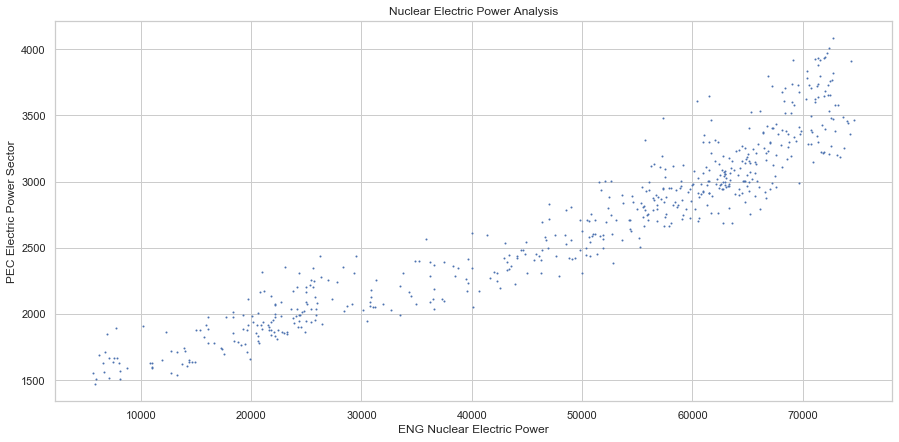

In [17]:
# Create basic scatter plot to view two-variable relationship
plt.figure(figsize=(15, 7))
plt.scatter(merged_df['Value_GENERATE'], merged_df['Value_CONSUME'], s=1)
plt.title('Nuclear Electric Power Analysis');
plt.xlabel(generate_category);
plt.ylabel(consume_category);

### Ejercicio 1:

Escriba código para producir diagramas de dispersión adicionales que brinden información sobre la relación entre el consumo de energía para el sector comercial y la generación de energía neta de energía eléctrica nuclear. ¿La relación entre estas variables es más fuerte o más débil en comparación con el resultado del sector eléctrico? ¿Qué podría significar esto en términos de una posible recomendación comercial?

## Tendencias en el consumo y generación de energía a lo largo del tiempo

Si bien un diagrama de dispersión nos ayuda a visualizar la relación entre dos variables, no nos permite mirar a lo largo del tiempo. Para ello, dispondremos de una herramienta diferente: el **gráfico de líneas**.

Un gráfico de líneas es excelente para ver datos de series de tiempo y nos ayudará a determinar las tendencias y patrones cíclicos a lo largo del tiempo tanto para el consumo de energía del sector eléctrico como para la generación de energía eléctrica nuclear.

Construyamos una gráfica lineal para cada una de estas series:

In [19]:
consume_category = 'PEC Electric Power Sector'
generate_category = 'ENG Nuclear Electric Power'

# Select electric power sector for energy consumption 
consume_df = clean_energy_df[clean_energy_df['Description'] == consume_category][['YYYYMM','Value']].reset_index(drop=True)

# Select electricity generated by all sectors
generate_df = clean_electricity_df[clean_electricity_df['Description'] == generate_category][['YYYYMM','Value']].reset_index(drop=True)

# Merge into one data frame for ease of plotting
merged_df = pd.merge(consume_df, generate_df, how='left', on=['YYYYMM'], suffixes=('_CONSUME','_GENERATE'))

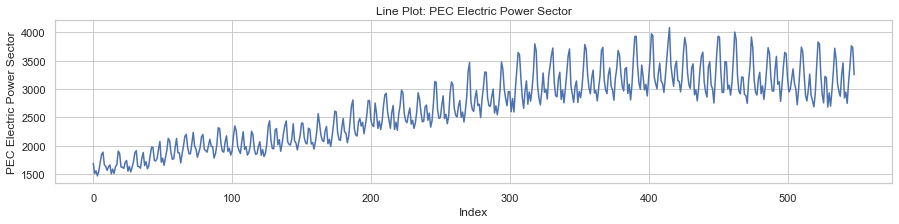

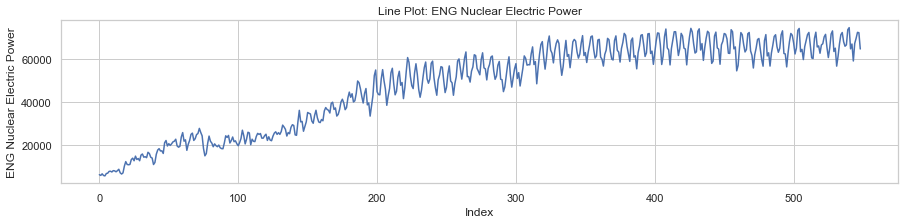

In [20]:
# Line plot for energy consumption over time
plt.figure(figsize=(15,3))
plt.plot(merged_df['Value_CONSUME'])
plt.title('Line Plot: ' + consume_category)
plt.xlabel('Index');
plt.ylabel(consume_category);

# Line plot for electricity generation over time
plt.figure(figsize=(15,3))
plt.plot(merged_df['Value_GENERATE'])
plt.title('Line Plot: ' + generate_category)
plt.xlabel('Index');
plt.ylabel(generate_category);

Note que vemos que tanto el consumo de energía como la generación están aumentando con el tiempo, con una fuerte tendencia cíclica (observe la naturaleza oscilante de la serie temporal). Sin embargo, la forma en que hemos trazado estos gráficos de líneas no formatea bien el eje x. Nos gustaría que el eje x fueran fechas en lugar de simplemente el valor del índice DataFrame.

### Mejora de la visualización de series de tiempo al incluir fechas formateadas en el gráfico de líneas

Afortunadamente, Python nos permite dar un formato agradable a las fechas para mostrarlas en la gráfica. Esto es útil cuando se incluye trabajo en un informe que se presentará a una audiencia, ya que es más profesional y más fácil de entender para personas no técnicas.

In [21]:
# Convert YYYYMM string to datetime format
merged_df['YYYYMM_dt'] = merged_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
merged_df.head()

,YYYYMM,Value_CONSUME,Value_GENERATE,YYYYMM_dt
0,197301,1691.096,6246.251,1973-01-01
1,197302,1511.458,5928.069,1973-02-01
2,197303,1559.159,6649.007,1973-03-01
3,197304,1470.152,5876.392,1973-04-01
4,197305,1551.631,5696.657,1973-05-01


d:\users\user\anaconda3\envs\unificador\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


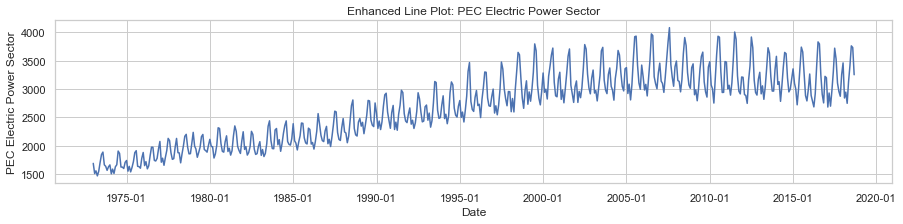

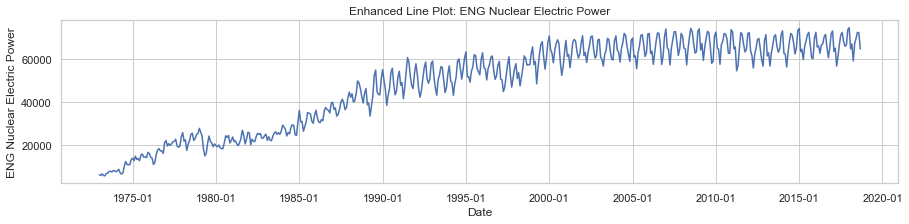

In [22]:
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_CONSUME'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + consume_category)
plt.xlabel('Date');
plt.ylabel(consume_category);

# Enhanced line plot for electricity generation over time
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(merged_df['YYYYMM_dt'], merged_df['Value_GENERATE'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # format x-axis display
plt.title('Enhanced Line Plot: ' + generate_category)
plt.xlabel('Date');
plt.ylabel(generate_category);

### Ejercicio 2:

Escriba código para determinar si las oscilaciones en la variable ```PEC Electric Power Sector``` aumentan con el tiempo (pista: use ```merged_df['Value_CONSUME'].pct_change()```). Visualice el cambio porcentual de cada mes a lo largo del tiempo, utilizando las fechas formateadas en el eje x.

Vemos que los cambios porcentuales de un mes a otro no están creciendo significativamente con el tiempo. Esto indica que las fluctuaciones porcentuales en el consumo de energía permanecen relativamente constantes, incluso cuando la cantidad total de energía utilizada a lo largo del tiempo ha aumentado.

A la luz de esto, una estadística útil para comprender mejor el uso de energía en relación con la generación de electricidad es la relación entre la energía consumida y la electricidad generada. Esto puede darnos una idea de qué tan bien la oferta satisface la demanda y cómo nuestro negocio de centrales nucleares puede expandirse y contraer la generación de electricidad en períodos de alta o baja demanda.

## Analizando la relación entre la energía consumida y la electricidad generada

Calculemos la relación entre la energía consumida y la energía generada. Usando el método de ``describe()``, observemos la distribución de esta relación. Comprender la distribución de la proporción permitirá al usuario ver cómo el consumo de energía y la generación de electricidad se desvían entre sí. Continuaremos analizando el consumo de energía del ``PEC Electric Power Sector`` y la generación de energía de ``ENG Nuclear Electric Power`` para esto:

In [23]:
# Add an additional 'Ratio' feature: energy consumed / energy generated
merged_df['Ratio'] = merged_df['Value_CONSUME'] / merged_df['Value_GENERATE']
merged_df['MM'] = merged_df['YYYYMM'].apply(lambda x: int(str(x)[-2:])) # add month for grouping in boxplot
merged_df['Ratio'].describe()

count    549.000000
mean       0.067657
std        0.037364
min        0.042228
25%        0.048509
50%        0.052726
75%        0.076986
max        0.272376
Name: Ratio, dtype: float64

También es útil para obtener una representación gráfica de la distribución de datos mediante la construcción de un histograma. Se puede mostrar un histograma usando el método ``plt.hist ()`` en Python. Este método de histograma toma la entrada ``bin`` que indica cuán granularmente le gustaría ver los datos. En este caso, usaremos 50 bins:

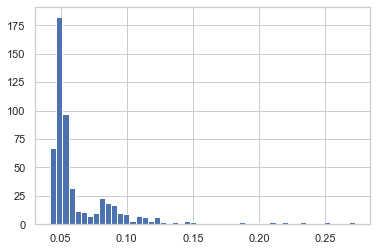

In [24]:
plt.hist(merged_df['Ratio'], bins=50);

Aquí vemos que la variable ``Ratio`` está agrupada en gran medida alrededor de 0.05, con algunos valores grandes que se extienden hacia arriba hasta 0.25, aunque estos valores más altos no son comunes (por lo tanto, tienen una barra con una altura menor en el histograma).

¿Hay algo que combine un visual para la distribución de los datos con estadísticas resumidas? ¡Sí! La **diagrama de caja**. Los diagramas de caja son un método gráfico rápido y fácil para observar si hay valores extremos significativos presentes en los datos y pueden ofrecer información sobre si los datos tienen una gran varianza o si están sesgados (skewed). Los diagramas de caja consisten en una caja interior y dos bigotes a cada lado. La línea horizontal central en el medio del cuadro corresponde a la mediana de los datos que representa el diagrama de caja, mientras que los bordes superior e inferior del cuadro representan el percentil 75 y el percentil 25 de los datos, respectivamente. Los bigotes se dibujan a una distancia de 1,5 * IQR de los bordes de la caja, donde IQR es el rango intercuartil de los datos, es decir, el valor del percentil 75 menos el valor del percentil 25. Por lo tanto, los diagramas de caja brindan un excelente resumen visual de la distribución de los datos.

Dado que vimos un patrón cíclico en el análisis de la gráfica lineal que precede a esta sección, echemos un vistazo más de cerca a cómo evoluciona la distribución de la relación de energía consumida a generada en los diferentes meses del año.

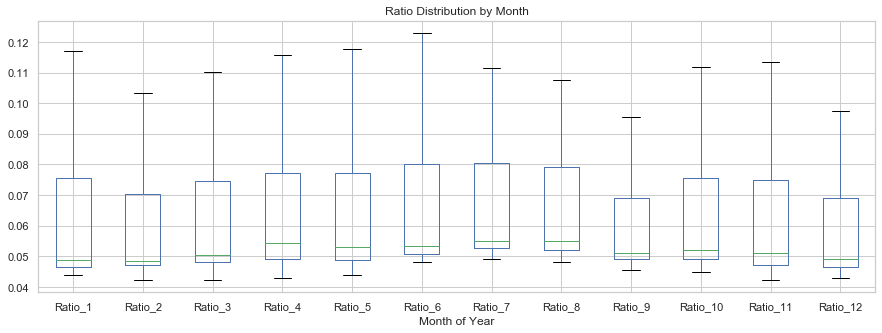

In [25]:
# Select months to use
unique_months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Loop through all months and store each DataFrame in list
df_list = []
for month_int in unique_months:
    temp_df = merged_df[merged_df['MM'] == month_int][['Ratio']].reset_index(drop=True) # Select month
    temp_df = temp_df.rename(columns={'Ratio':'Ratio_'+str(month_int)}) # rename for ease of plotting
    df_list.append(temp_df) # store for later concatenation

# Aggregate data
plot_df = pd.concat(df_list, axis=1)

# Box plots
fig, ax = plt.subplots(figsize=(15,5))
plot_df.boxplot(ax=ax, showfliers=False)
ax.set_xlabel('Month of Year');
ax.set_title('Ratio Distribution by Month');

Aquí, vemos un patrón de ratios más altos en los meses de verano, particularmente julio (mes 7) y agosto (mes 8). Los recuadros del diagrama de recuadros se desplazan hacia arriba en los meses de verano y, posteriormente, hacia abajo en los meses de invierno.

### Ejercicio 3:

Recuerde que la relación es la energía consumida (PEC Sector de energía eléctrica) dividida por la energía generada (ENG Energía eléctrica nuclear). Vemos que el ratio de energía consumida sobre generada tiene una ligera tendencia al alza a mediados de año. ¿Cuál podría ser una posible razón de este patrón? ¿Qué le recomendaría a su jefe basándose en esto?

Ahora que hemos visto algunas de las herramientas básicas de visualización de datos de Python, comencemos a explorar estos picos cíclicos en los meses de verano utilizando un segundo paquete muy útil: ```seaborn```.

## Usando ```seaborn``` para una visualización avanzada de los patrones cíclicos identificados

```seaborn``` es una biblioteca de visualización de datos extremadamente útil para figuras simples y complejas. Pasaremos por algunas funciones de trazado importantes mientras continuamos identificando tendencias en los datos de energía.

Para explorar más a fondo los patrones cíclicos identificados en los meses de verano, etiquetemos las filas en el ``merged_df`` que representan los meses de verano (llámelos meses pico) y usemos la función ```pairplot ()``` de seaborn para visualizar las diferencias de distribución en la energía consumida y la electricidad generada entre los meses pico y no pico:

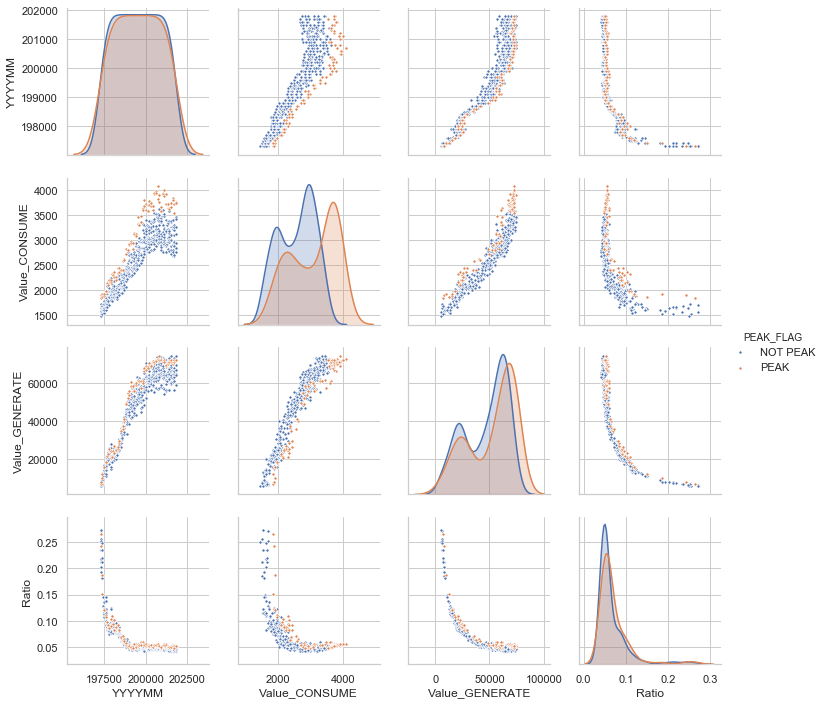

In [26]:
# Add a flag for summer months
customized_df = merged_df.copy()
customized_df['PEAK_FLAG'] = customized_df['YYYYMM'].apply(lambda x: 'PEAK' if str(x)[-2:] in ['07','08'] else 'NOT PEAK')

sns.pairplot(customized_df, hue='PEAK_FLAG', x_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], y_vars=['YYYYMM','Value_CONSUME','Value_GENERATE','Ratio'], plot_kws={'s':10});

Aquí, vemos que el diagrama de pares toma cada columna numérica en el DataFrame y crea un diagrama de dispersión contra las otras columnas numéricas. Los gráficos resultantes luego se alinean en una cuadrícula para una fácil visualización. Los gráficos a lo largo de la diagonal principal son gráficos de las distribuciones de las columnas individuales presentes en el DataFrame. Además, tenga en cuenta que todos los puntos de datos están coloreados de acuerdo con su estado pico / no pico. Por lo tanto, ``pairplot ()`` proporciona una cantidad increíble de información sobre nuestros datos.

Observamos que los meses pico sí tienen diferentes distribuciones de energía consumida y energía generada en comparación con los meses no pico. Pero hasta ahora, solo hemos analizado los meses a nivel agregado para ver si algunos meses tienen mayor consumo de energía y generación que otros. Nuestro jefe quiere que investiguemos cómo estos patrones han cambiado con el tiempo, y parte de esa tarea requiere que miremos estos patrones a lo largo de los años.

## ¿Los meses pico de consumo y generación son consistentes a lo largo de muchos años?

Analicemos ahora el análisis a un nivel mes a mes a lo largo del tiempo para ver si los patrones cíclicos máximos que vemos son estables a lo largo de muchas décadas de datos.

```seaborn``` ofrece un poderoso **método de mapa de calor** ``heatmap()`` que nos permitirá visualizar muy bien la energía mensual consumida y la electricidad generada a lo largo del tiempo:

In [27]:
# Extract year to be used in heatmap
customized_df['YYYY'] = customized_df['YYYYMM'].apply(lambda x: str(x)[:-2])

# Create pivot table (formats data to make it easy to visualize data across months and years)
pivot_elec_df = customized_df.pivot('MM','YYYY','Value_GENERATE')
pivot_ener_df = customized_df.pivot('MM','YYYY','Value_CONSUME')

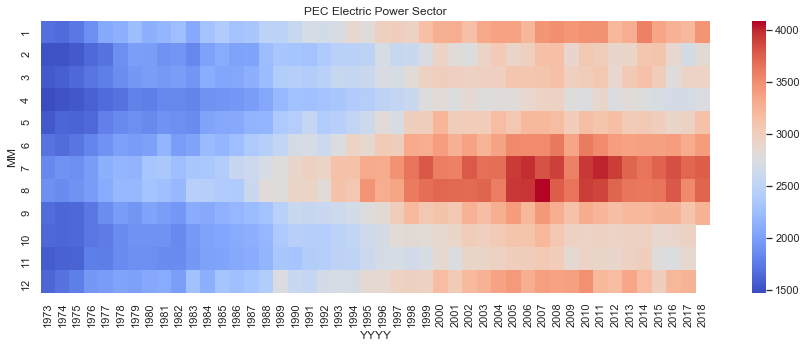

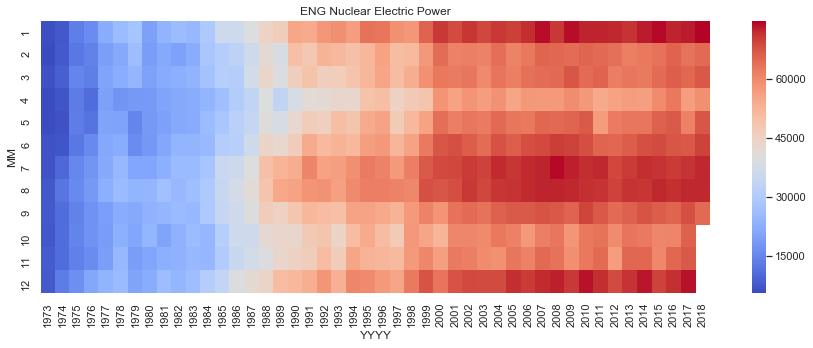

In [28]:
# Heat map of energy consumption by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_ener_df, cmap="coolwarm", ax=ax);
ax.set_title('PEC Electric Power Sector');

# Heat map of electricity generation by month and year
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_elec_df, cmap="coolwarm", ax=ax);
ax.set_title('ENG Nuclear Electric Power');

La barra de color de la derecha indica el nivel de la variable en estudio. Usando el mapa de calor, es fácil ver que hay un aumento notable tanto en el consumo de energía como en la generación en los meses pico de verano que comenzaron en la década de 1990. Sin embargo, en los primeros años (antes de 1990) la diferencia entre los meses pico de verano y otros meses no es tan marcada (aunque todavía existe). Esto puede deberse al aumento en el uso de unidades de refrigeración en las últimas décadas.

Además, vemos que la energía total consumida y la electricidad generada con el tiempo están aumentando. Esto se indica mediante los colores que se mueven de azul a rojo en ambos mapas de calor a medida que pasan los años. Esto se espera, ya que la demanda agregada ha aumentado debido a numerosos factores externos, como el crecimiento de la población y el mayor uso de tecnología, los cuales conducen a una mayor demanda de energía y suministro de electricidad.

Evidentemente, estos mapas de calor son enormemente útiles para identificar grandes tendencias a lo largo del tiempo. Sin embargo, una desventaja de estos mapas de calor es que es difícil ser más granular y ver cambios en las tasas de crecimiento de un año a otro. Construyamos un diagrama de caja para comprender mejor si el crecimiento es estable a lo largo del tiempo y si esto se traduce en un crecimiento tanto en los meses pico como en los no pico.

### Ejercicio 4:

Dado que hemos analizado cómo se movió la relación entre la energía consumida y la electricidad generada a lo largo del tiempo, creemos una vista gráfica para determinar qué tan estable ha sido la relación entre estas dos cantidades durante las últimas décadas. Escriba un script para generar un mapa de calor que muestre la relación entre el consumo de energía del ``Electric Power Sector``  y ``ENG Nuclear Electric Power`` para cada YYYY y MM. Utilice ```custom_df``` para el análisis.

Aquí notamos que la relación entre la energía consumida y la electricidad generada se ha mantenido relativamente estable a lo largo del tiempo. Hubo una gran desviación en la relación de las dos cantidades a principios de la década de 1970 y un poco hacia principios de la de 1980, pero desde entonces los valores se han mantenido estables durante todo el año.

## Evaluar las diferencias de estabilidad del crecimiento en las demandas de energía de los meses pico a lo largo del tiempo
Una forma de comprender mejor la estabilidad del crecimiento del consumo de energía y la generación de electricidad es ver los datos de distribución a lo largo del tiempo. En este caso, combinaremos diagramas de caja para cada año, dividiéndolos para los meses pico y no pico, y determinaremos cuán estable han sido las categorías de crecimiento, consumo y generación.

Usaremos nuevamente la funcionalidad ```boxplot ()``` de seaborn, pero esta vez agregaremos una bandera para dibujar dos diagramas de caja para cada año basados en ```PEAK_FLAG```. Los diagramas de caja para los meses pico y no pico serán de diferentes colores.

### Ejercicio 5:

Centrándose en ```customized_df```, escriba un script para generar el diagrama a continuación.

In [1]:
Image("ExampleImage.png")

NameError: name 'Image' is not defined

Aquí vemos que el crecimiento en los meses pico y no pico ha sido relativamente estable, pero en los últimos años se ha estancado. También observe que la diferencia entre los meses pico y no pico se ha ampliado con el tiempo. Esta mayor fluctuación entre los meses pico y no pico podría presentar una oportunidad para su empresa y vale la pena seguir investigando.

Hemos analizado de cerca los cambios en la generación y el consumo de energía eléctrica nuclear a lo largo del tiempo. Pasemos ahora a la segunda parte de la solicitud de su jefe observando los patrones de consumo en todos los sectores. Esto tiene importantes implicaciones sobre la forma en que la alta dirección debería asignar recursos para el negocio de generación de energía nuclear.

## ¿Qué sectores consumen más energía?

``seaborn`` proporciona una variedad de gráficos que serán útiles en este análisis. Echaremos un vistazo a ``boxplot ()`` y ``stripplot ()``.

```seaborn``` divide fácilmente los datos en categorías y crea un diagrama de caja de valores para cada categoría:

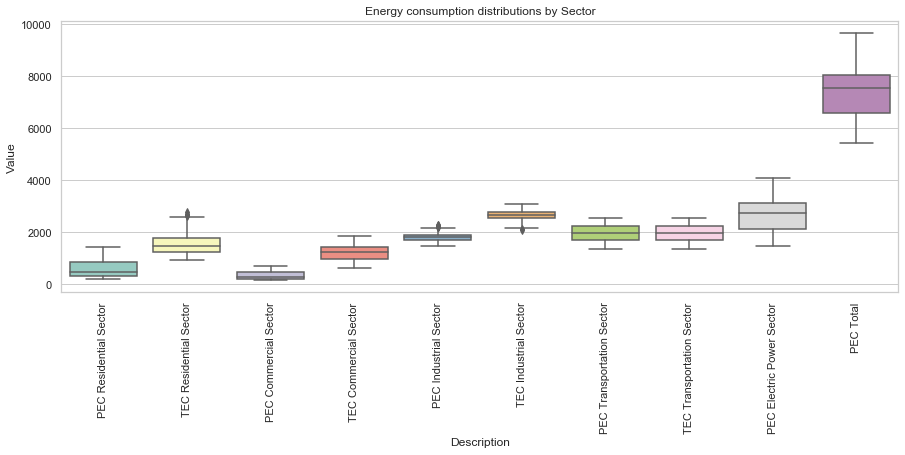

In [27]:
# Boxplot of different sectors' energy consumption values
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", ax=ax)
plt.xticks(rotation=90);
plt.title('Energy consumption distributions by Sector');

Aquí vemos que el sector de energía eléctrica de PEC tiene el mayor consumo de energía en todos los sectores. También vemos que hay diferencias considerables en la variabilidad del consumo de energía entre sectores (algunos diagramas de caja tienen rangos intercuartílicos mucho más grandes que otros).

Sin embargo, aunque los diagramas de caja le dan una idea de la distribución de los datos subyacentes en cada categoría, siguen siendo instrumentos relativamente contundentes. Por ejemplo, ¿cómo se distribuyen los datos dentro del rango intercuartílico? ¿Entre los bordes de la caja y los bigotes? Dado que una gráfica de caja se crea a partir de solo cinco valores, no puede responder estas preguntas detalladas. Sin embargo, el **strip plot** puede combinar un gráfico de dispersión 1D con una división por categoría para obtener una vista aún más granular de los datos.

## Una visión más detallada del consumo de energía por sector

``stripplot ()`` en ```seaborn``` crea una serie de diagramas de dispersión 1D (uno para cada categoría de datos) todos compartiendo el mismo eje y:

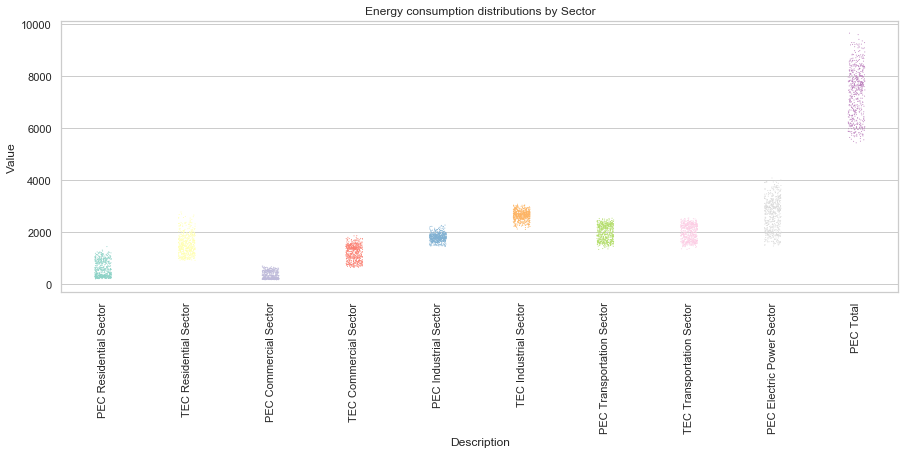

In [28]:
# Create a stripplot() of the data for a nice granular view
fig, ax = plt.subplots(figsize=(15,5))
m = sns.stripplot(x="Description", y="Value", data=clean_energy_df, palette="Set3", s=1, ax=ax)
plt.xticks(rotation=90);
plt.title('Energy consumption distributions by Sector');

### Ejercicio 6:

De los gráficos anteriores, ¿cuál de los sectores tiene el rango más amplio de valores de PEC? ¿Cuál de los sectores tiene el rango más pequeño de valores de PEC? ¿Cómo podría esta información ser útil para las empresas de producción de energía?

Ahora, pasemos a nuestra tarea final: ¿cómo generamos archivos para estas parcelas para que puedan usarse en la presentación de su jefe a la C-suite?

# Generación de visualizaciones

Echemos un vistazo a cómo crear gráficos de valores para cada sector de consumo de energía, además de cómo agregar programáticamente una carpeta donde guardaremos los gráficos como archivos PNG:

In [29]:
# Construct DataFrame that will be used for plotting
plot_df = clean_energy_df.copy()
plot_df['YYYYMM_dt'] = plot_df['YYYYMM'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m"))
plot_df.head()

,YYYYMM,Value,Description,Unit,MM,YYYY,YYYYMM_dt
0,197301,1313.816,PEC Residential Sector,Trillion Btu,1,1973,1973-01-01
1,197302,1150.011,PEC Residential Sector,Trillion Btu,2,1973,1973-02-01
2,197303,970.362,PEC Residential Sector,Trillion Btu,3,1973,1973-03-01
3,197304,709.631,PEC Residential Sector,Trillion Btu,4,1973,1973-04-01
4,197305,544.596,PEC Residential Sector,Trillion Btu,5,1973,1973-05-01


Ahora creemos una carpeta llamada ```PlotDir``` donde guardaremos los gráficos en archivos PNG:

In [30]:
# Make new folder to save plots
plot_dir = os.path.join(os.getcwd(), 'PlotDir')

# Only make new folder if it doesn't already exist
if not(os.path.isdir(plot_dir)):
    os.mkdir(plot_dir) # creates new folder

Finalmente, recorra todos los sectores de consumo de energía, cree diagramas de líneas y guarde las visualizaciones:

In [31]:
# One can quickly generate and save plots with ease in Juypter
unique_desc = sorted(plot_df['Description'].unique())
for i in unique_desc:
    fig, ax = plt.subplots(figsize=(15,4))
    temp_df = plot_df[plot_df['Description'] == i]
    ax.plot(temp_df['YYYYMM_dt'], temp_df['Value'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m')) # format x-axis display

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Data Description: ' + str(i))
    plt.tight_layout()
    
    # Save to png
    file_name = 'SectorPlot ' + str(i) + '.png'
    print("Saving: " + file_name)
    fig.savefig(os.path.join(plot_dir,file_name)) # save to png (save in plot_dir)
    plt.close(fig) # Do not print plots to notebook (large number of plots can take up significant memory)

Saving: SectorPlot PEC Commercial Sector.png
Saving: SectorPlot PEC Electric Power Sector.png
Saving: SectorPlot PEC Industrial Sector.png
Saving: SectorPlot PEC Residential Sector.png
Saving: SectorPlot PEC Total.png
Saving: SectorPlot PEC Transportation Sector.png
Saving: SectorPlot TEC Commercial Sector.png
Saving: SectorPlot TEC Industrial Sector.png
Saving: SectorPlot TEC Residential Sector.png
Saving: SectorPlot TEC Transportation Sector.png


Hemos guardado los resultados en la carpeta `` PlotDir``. Cada gráfico se ha creado con la misma estructura de código general, lo que garantiza que los gráficos resultantes tengan el mismo formato, aunque cada uno contenga datos de un sector diferente. Este método programático de generación de gráficos es muy útil al crear procedimientos de visualización de datos sistemáticos en investigaciones de datos simples y complejas.

### Ejercicio 7:

Escriba un script para generar un diagrama de diagramas de caja de ```Value``` para cada año en ``` clean_energy_df```, donde los diagramas de caja se crean a partir de los valores de cada categoría de sector a partir de ```Description```. Por ejemplo, la gráfica de caja para el año 2000 se muestra a continuación. Guarde los gráficos en archivos PNG en una nueva carpeta ``YearlyBoxplotDir`` (cree esto), y nombre las figuras en el formato ```YearlyBoxplot_ [yearnum] .png```, donde reemplaza ``[yearnum ] `` con el año correcto. Por ejemplo, el diagrama de caja del año 2000 se guarda como ``YearlyBoxplot_2000.png``. Debe producir una figura de diagrama de caja para cada año desde 1973 hasta 2018; por lo tanto, tendrá un archivo de imagen PNG por año.

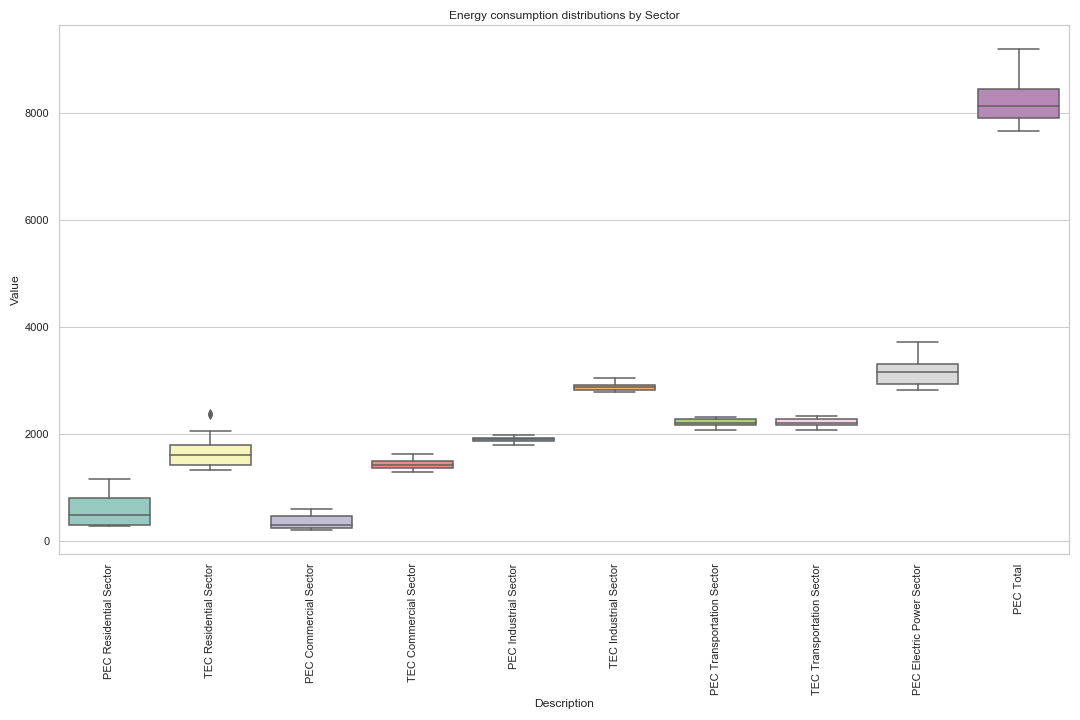

In [32]:
# Example of one of the years boxplot figures
Image("YearlyBoxplot_2000.png")

## Conclusiones

Hemos realizado un análisis exhaustivo del consumo de energía y las tendencias de generación de electricidad a lo largo del tiempo y en todos los sectores.

Descubrimos que hay un pico en el consumo y la generación de energía en los meses de verano del año y, a medida que pasa el tiempo, la brecha entre el consumo pico y el no pico se ha ampliado. Esto puede presentar una oportunidad de mercado para una planta de energía que tiene la capacidad de expandirse y contraer capacidad según sea necesario.

Finalmente, vimos que los diferentes sectores tienen perfiles de consumo de energía muy diferentes. En particular, el sector de la energía eléctrica parece ser un impulsor significativo de la demanda marginal. Esto significa que incluso para las apuestas de mesa, su empresa debería dedicar recursos importantes a ese sector.

## Para tener en cuenta

En este caso, hemos cubierto una variedad de técnicas de visualización de datos en Python. Cubrimos el trazado básico para observar relaciones y tendencias a lo largo del tiempo, e introdujimos la omnipresente biblioteca ``seaborn`` que ofrece una funcionalidad de trazado avanzada. También aprendimos cómo generar parcelas programáticamente que pueden ser muy útiles para comunicarnos con partes interesadas no técnicas cuando se aboga por grandes cambios organizacionales.